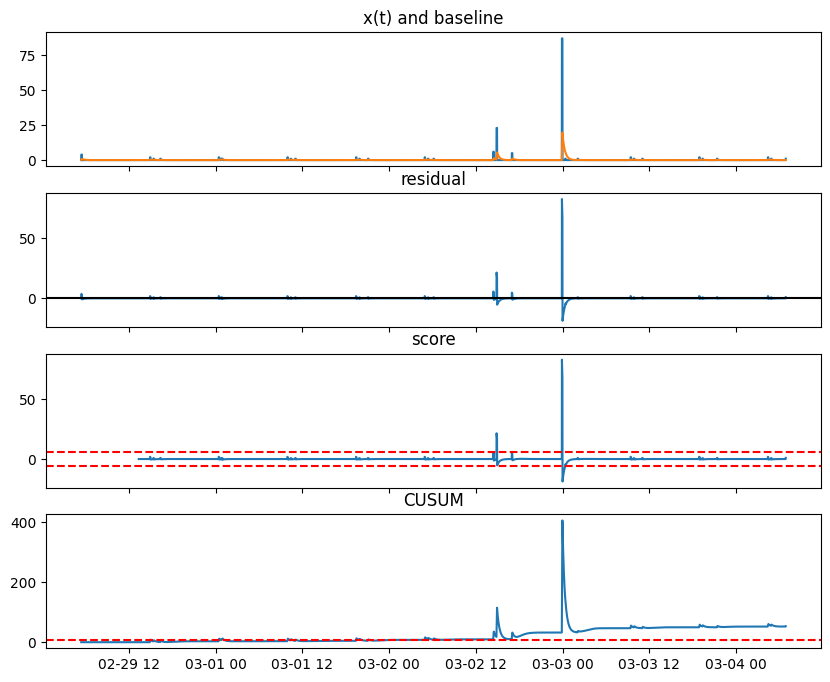

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

"""
How you can run the tool and generate the example files used in this notebook(signal_analysis_example.ipynb):

python signals.py build --input dc_security.csv --channels channels.yaml --hop 1m --window 5m --out signals.parquet
python signals.py detect --input signals.parquet --alpha 0.05 --score-window 240 --threshold 6 --cusum --out analyzed.parquet

Where I got the data: 
https://github.com/splunk/attack_data/tree/master/datasets/attack_techniques/T1558.003/unusual_number_of_kerberos_service_tickets_requested

There is a file there called "windows-xml.log", I parsed this into an event stream named "dc_security.csv" which is used as input. 

"""

df = pd.read_parquet("analyzed.parquet")
df.columns


g = (
    df.query("channel == 'event_4769_global' and series_key == 'global'")
      .set_index("ts")
      .sort_index()
)

fig, axs = plt.subplots(4, 1, figsize=(10,8), sharex=True)

axs[0].plot(g.index, g["value"])
axs[0].plot(g.index, g["baseline"])
axs[0].set_title("x(t) and baseline")

axs[1].plot(g.index, g["residual"])
axs[1].axhline(0, color="black")
axs[1].set_title("residual")

axs[2].plot(g.index, g["score"])
axs[2].axhline(6, color="red", linestyle="--")
axs[2].axhline(-6, color="red", linestyle="--")
axs[2].set_title("score")

axs[3].plot(g.index, g["cusum"])
axs[3].axhline(6, color="red", linestyle="--")
axs[3].set_title("CUSUM")

plt.show()
